# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>

| Variável                | Descrição                                           | Tipo |
| ----------------------- |:---------------------------------------------------:| ------:|
| data_ref                |  Data de referencia                                 | texto  |
| id_cliente              |  Id do cliente                                      | inteiro|
| sexo                    |  Sexo do cliente                                    |  M/F   |
| posse_de_veiculo        |  Indica se o cliente possui veiculo                 |  Y/N   |
| posse_de_imovel         |  Indica se o cliente possui imovel                  |  Y/N   |
| qtd_filhos              |  Quantidade de filhos do cliente                    | inteiro|
| tipo_renda              |  Tipo de renda do cliente                           | texto  |
| educacao                |  Grau de educaçao do cliente                        | texto  |
| estado_civil            |  Estado civil do cliente (ex:casado, solteiro)      | texto  |
| tipo_residencia         |  Tipo de residencia do cliente (ex:propria, alugada)| texto  |
| idade                   |  Idade do cliente                                   | inteiro|
| tempo_emprego           |  Tempo no emprego atual                             | float  |
| qt_pessoas_residencia   |  Quantidade de pessoas que moran na residencia      | float  |
| renda                   |  renda                          | float  |






#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d3bae35c55e73450cfe40b54522cecb6bb0cddba5385f068ebb2982acbcf7bea
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from pandas_profiling import ProfileReport

<ipython-input-3-d3bf5bf59b1c>:14: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [5]:
print(df['renda'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['renda'].mean())

renda
5402.44     6
1272.04     6
9826.31     6
43433.94    6
728.96      6
           ..
8394.82     1
7827.08     1
5741.98     1
5699.89     1
1160.99     1
Name: count, Length: 9786, dtype: int64

Taxa de inadimplentes:
5697.287056666667


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [9]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">Podemos realizar uma boa analize exploratoria de nossa base de dados utilizando o metodo ProfileReport</span>


### Entendimento dos dados - Bivariadas




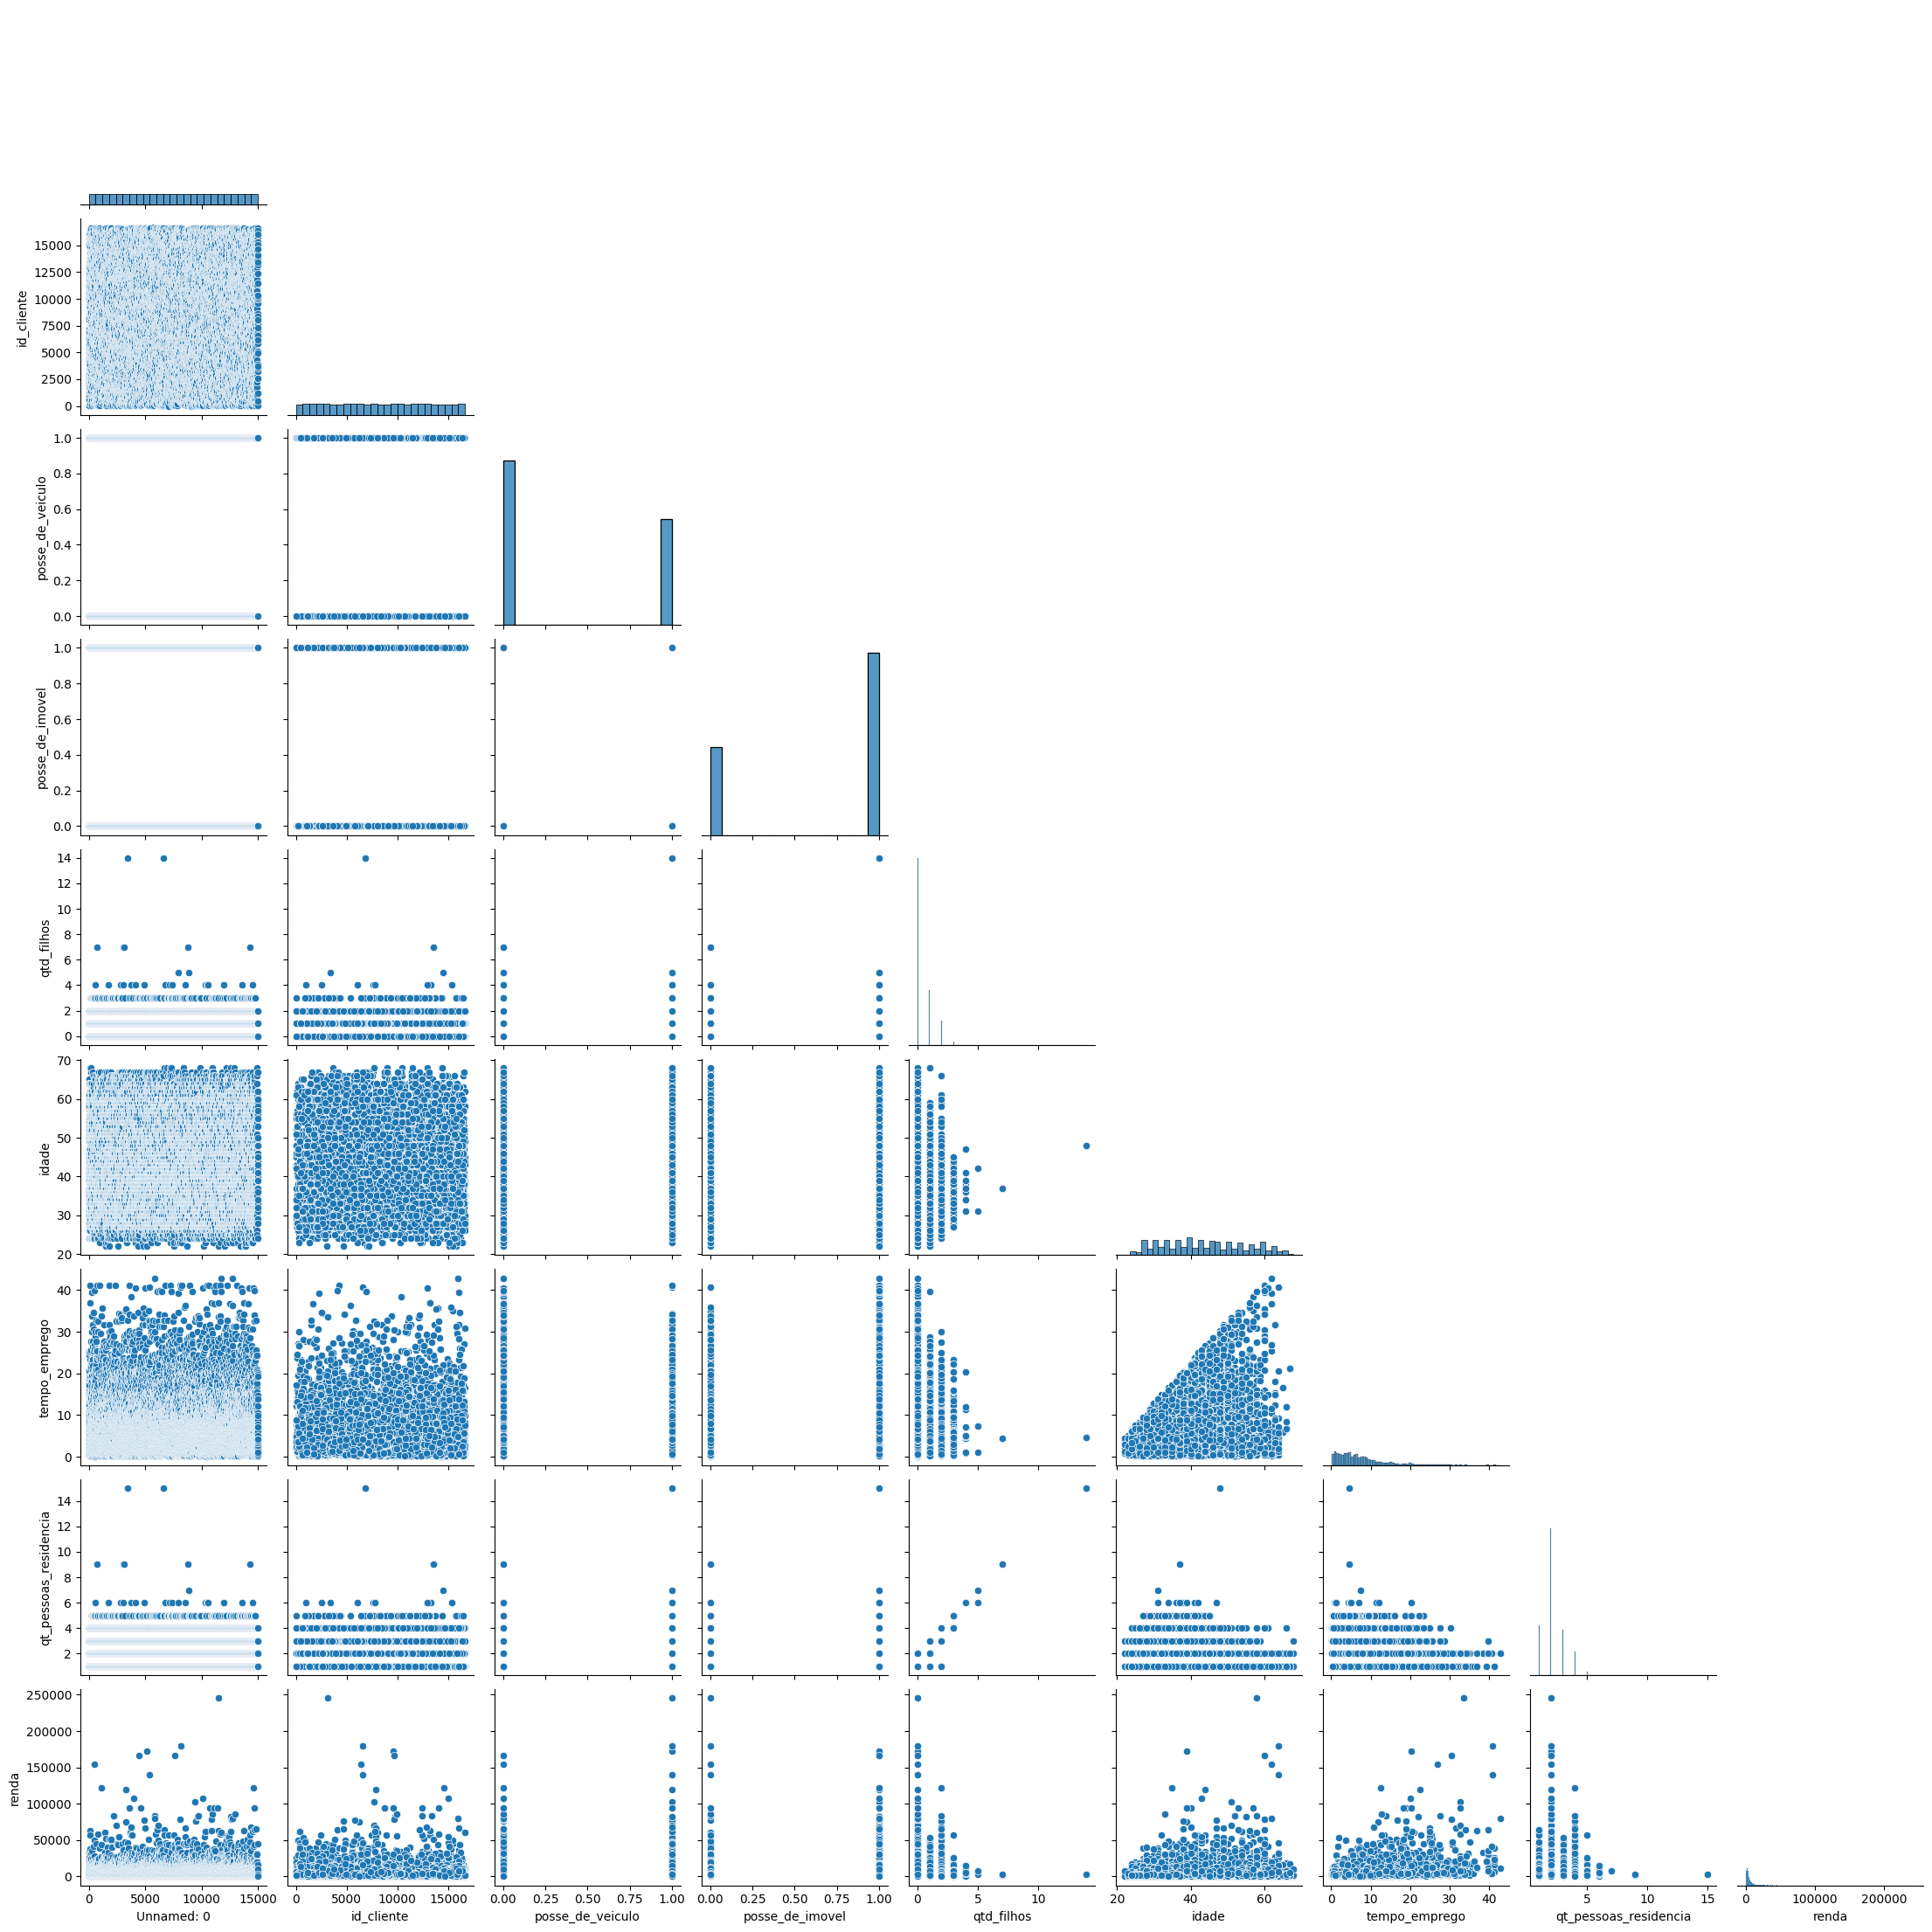

In [11]:
sns.pairplot(data= df, corner= True)

<span style="color:red">Utilizando o Seaborn geramos grafico bivariados de todas as variaveis</span>


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [12]:
df.drop(['data_ref', 'id_cliente'], axis= 1, inplace= True)

In [13]:
df.isna().value_counts()

Unnamed: 0  sexo   posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_renda  educacao  estado_civil  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia  renda
False       False  False             False            False       False       False     False         False            False  False          False                  False    12427
                                                                                                                              True           False                  False     2573
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [15]:
df= pd.get_dummies(df, columns= df.select_dtypes(include= 'object').columns, dummy_na= False)

In [16]:
df.head()

,Unnamed: 0,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,False,True,0,26,6.602740,1.0,8060.34,True,False,...,False,True,False,False,False,True,False,False,False,False
1,1,True,True,0,28,7.183562,2.0,1852.15,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2,True,True,0,35,0.838356,2.0,2253.89,True,False,...,False,False,False,False,False,True,False,False,False,False
3,3,False,True,1,30,4.846575,3.0,6600.77,True,False,...,False,False,False,False,False,True,False,False,False,False
4,4,True,False,0,33,4.293151,1.0,6475.97,False,True,...,False,True,False,False,False,False,False,False,False,True


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [17]:
x= df.drop('renda', axis= 1)
y= df['renda']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42)

In [18]:
modelo = RandomForestRegressor(n_estimators=3)
modelo.fit(x_train, y_train)

RandomForestRegressor(n_estimators=3)

In [19]:
y_pred = modelo.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [20]:
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R-squared: 0.29
Mean Squared Error: 46723208.53


## Etapa 5 Crisp-DM: Avaliação dos resultados


Os resultados indicam que o modelo possui uma capacidade moderada de explicar a variabilidade dos dados no conjunto de test.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.